In [71]:
import numpy as np

from PIL import Image, ImageFilter, ImageOps, ImageDraw
import matplotlib.pyplot as plt
from matplotlib import gridspec

import glob
import pathlib
import os

In [65]:
base_path = pathlib.Path('data')
extensions = ['jpg', 'png']

images_list = []
for extension in extensions:
    images_paths = glob.glob(str(pathlib.Path('data', f'*.{extension}')))
    images_list.extend(images_paths)
    
images_list

['data/11.jpg',
 'data/01.jpg',
 'data/05.jpg',
 'data/07.jpg',
 'data/14.jpg',
 'data/08.jpg',
 'data/17.jpg',
 'data/18.jpg',
 'data/02.jpg',
 'data/06.jpg',
 'data/03.jpg',
 'data/10.jpg',
 'data/12.jpg',
 'data/15.jpg',
 'data/13.jpg',
 'data/19.jpg',
 'data/16.jpg',
 'data/09.jpg',
 'data/04.jpg']

In [79]:
def save_image(img, export_path, file_name):
    file_path = pathlib.Path(export_path, f"{file_name}.jpg")
    img.save(file_path)

data/01.jpg


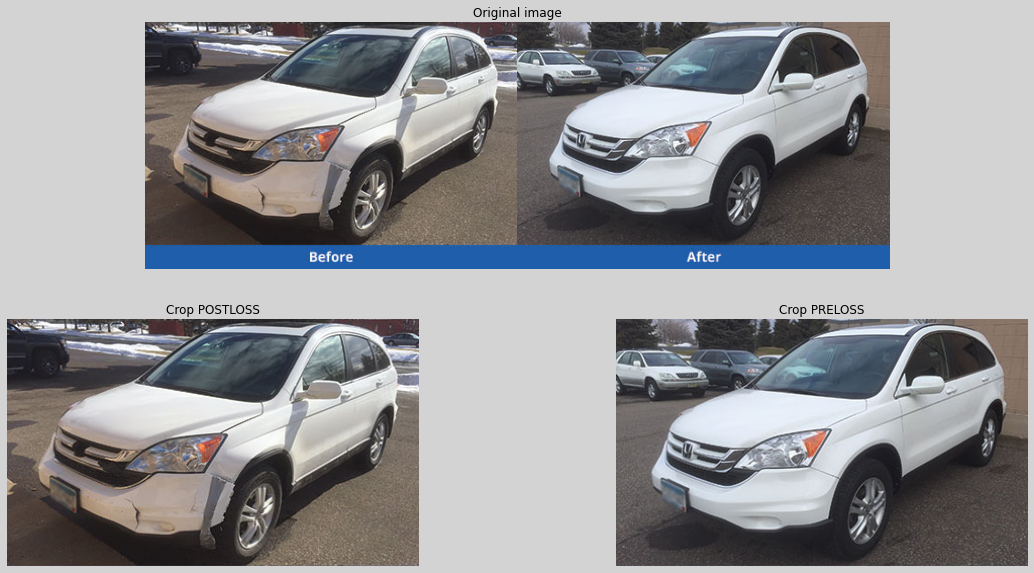

In [81]:
print(str(images_list[1]))

width = 408
height = 245

w_offset_1 = 0
h_offset_1 = 0

w_offset_2 = w_offset_1 + width
h_offset_2 = h_offset_1

left_label = "postloss"
right_label = "preloss"

export_path = pathlib.Path('data', 'export')
clear_export_folder = True

if os.path.exists(export_path) and clear_export_folder:
    for file in  os.listdir(export_path):
        os.remove(pathlib.Path(export_path, file))
    os.rmdir(export_path)
    os.mkdir(export_path)
    
# ////////////

fig = plt.figure(figsize=(20,10), facecolor='lightgray')
ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(2, 2), loc=(1, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 1), colspan=1)

img = Image.open(str(images_list[1]))
ax1.set_title("Original image")
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

im1 = img.crop((w_offset_1, h_offset_1, w_offset_1+width, h_offset_1+height))
ax2.set_title(f"Crop {left_label.upper()}")
ax2.imshow(im1, cmap='gray', vmin=0, vmax=255)
ax2.axis('off')

im2 = img.crop((w_offset_2, h_offset_2, w_offset_2+width, h_offset_2+height))
ax3.set_title(f"Crop {right_label.upper()}")
ax3.imshow(im2, cmap='gray', vmin=0, vmax=255)
ax3.axis('off')

file_name = pathlib.Path(images_list[1]).stem
save_image(im1, export_path, f"{file_name}_{left_label}")
save_image(im2, export_path, f"{file_name}_{right_label}")

plt.show()